In [1]:
import sys, datetime
from qick.asm_v2 import QickSweep1D

sys.path.append("../Libraries") # replace this with your location of the Libraries folder
from resonator_power_spectroscopy import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load Autonics TM4 Driver


Pyro.NameServer PYRO:Pyro.NameServer@0.0.0.0:8884
chatot PYRO:obj_6517ab0284a74fa5bc3b98f9677cf6d6@192.168.137.104:46765


  0%|          | 0/500000 [00:00<?, ?it/s]

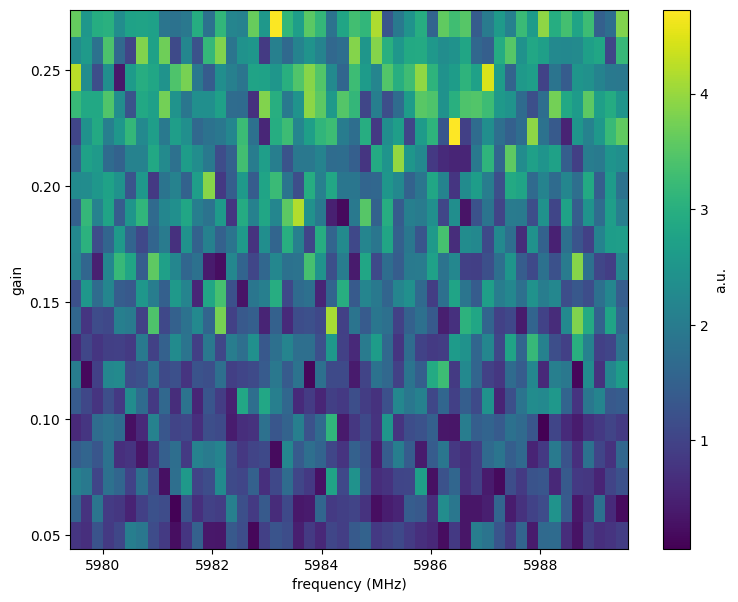

Creating directory G:\My Drive\chatot\data\resonator_power_spectroscopy\2024_11_20\12;14;17\
Data saved to G:\My Drive\chatot\data\resonator_power_spectroscopy\2024_11_20\12;14;17\data.h5
Config saved to G:\My Drive\chatot\data\resonator_power_spectroscopy\2024_11_20\12;14;17\cfg.json


In [2]:
date = str(datetime.datetime.now().strftime('%Y_%m_%d'))
time = str(datetime.datetime.now().strftime('%H;%M;%S'))

datapath = f'G:\\My Drive\\chatot\\data\\resonator_power_spectroscopy\\{date}\\{time}\\' # replace this with your data location

config_file = f"..\\..\\..\\..\\cfg\\llosta.json" # replace this with your config

meas = resonator_power_spectroscopy(path=datapath, config_file=config_file)

#frequency
center = 5984.5
span = 5
#gain
min_gain = 0.05
max_gain = 0.27

meas.cfg.expt = {
    "n_avg": 500,
    "ro_len": 13,
    "pulse_len": 7,
    "phase": 0,
    "gain": QickSweep1D('gain_loop', min_gain, max_gain),
    "trig_offset": 0.5,
    "freq": QickSweep1D('freq_loop', center - span, center + span),
    "freq_steps": 50,
    "center": center,
    "span": span,
    "min_gain": min_gain,
    "max_gain": max_gain,
    "gain_steps": 20
}

meas.acquire()
meas.display()
meas.savedata()